### Importing libraries

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import svm

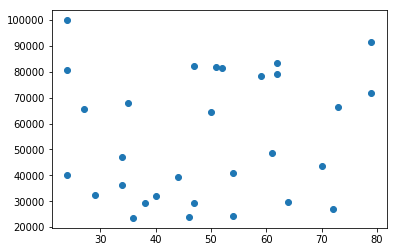

In [5]:
np.random.seed(0)
age=np.random.randint(15,80,30)
income=np.random.randint(20000,100000,30)

plt.scatter(age,income)
plt.show()

# Before starting SVC we used kmeans to find the Labels and categorize data with their centers and after that we will use these labels in svc.


In [6]:
data=np.c_[age,income]
model=KMeans(n_clusters=5).fit(scale(data))
label=model.labels_
centroids=model.cluster_centers_
label

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([0, 0, 3, 4, 4, 0, 2, 3, 1, 1, 0, 4, 2, 2, 0, 3, 1, 4, 4, 4, 4, 1, 0,
       2, 1, 4, 4, 4, 0, 1])

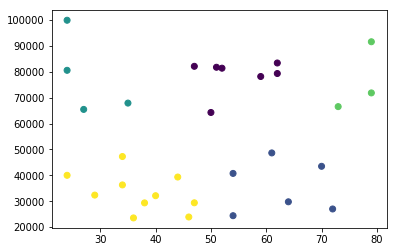

In [7]:
plt.scatter(data[:,0],data[:,1],c=label)
plt.show()

#### inverse_function does the inverse of scaling
To plot the centroids, we need to do inverse of scaling for the centroids and then plot. this is a formula for scaling data.
 <img width=400, height=400 src=Z-scores.png>


In [8]:
#invf - inverse_function does the inverse of scaling
def invf(x,y):
    import numpy as np
    return np.c_[[np.std(age)*i+np.mean(age) for i in x],[np.std(income)*i+np.mean(income) for i in y]]

reverse_centroid=invf(centroids[:,0],centroids[:,1])

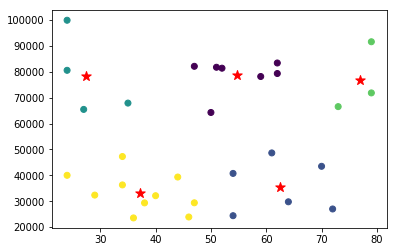

In [9]:
plt.scatter(data[:,0],data[:,1],c=label)
plt.scatter(reverse_centroid[:,0],reverse_centroid[:,1],marker="*",s=100,c='r')
plt.show()

# SVC

Watch a video about Support Vector Machine and try to understand before proceeding.

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Y6RRHw9uN9o" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### SVC
<font size=4 color='red'>
Support Vector Classifier tries to find the best hyperlane to separate the different classes by maximizing the distance data points and the hyperplane
</font>

#### Let's store data(matrice) and labels into X and Y accordingly

In [11]:
X=data
Y=label

#### Let's fit our data and labels into svm.SVC function and choose kernel type to be linear at first

<font size=4 color='red'>
    There are different types of kernels such as "Polynomial","RBF" and "Linear".<br>
    However, we will be using "Linear" kernel at first
     <img width=300, height=300 src=kernelfunction.png>
</font>

In [2]:
#SVC - Support Vector Classification
svc_model_linear=svm.SVC(kernel='linear').fit(X,Y)

NameError: name 'svm' is not defined

<font size=4>The model is ready, now let's plot it. <br>
We will use meshgrid to help visualize the model</font>

In [13]:
import numpy as np
xx,yy=np.meshgrid(np.arange(14.0,81,0.5), np.arange(20000,100500,10))

Z=svc_model_linear.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)

### Meshgrid
<font size=3> 
    Meshgrid creates rectangular grid from values of X,Y arrays.
</font>

### np.arange
<font size=3> 
    Generates values within an <b>interval</b> based on passed parameters. <br>
    First parameter: Start of interval<br>
    Second parameter: End of interval<br>
    Third parameter: Spacing between values
</font>

### Ravel
<font size=3>
    .ravel function transforms any D-array into flattened array(1 dimentional)<br><br>
    <img width=300, height=300 src=ravel.png>
</font>
<font size=3>
    <b>np.shape</b> returns tuple containing dimension of the passed array<br>
    <b>np.reshape</b> gives a new shape to an array without changing its data
    <img width=300, height=300 src=shape.png>
    <img width=300, height=300 src=reshape.png>
</font>

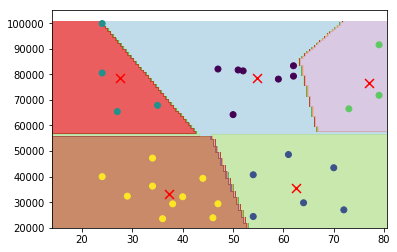

In [14]:
plt.contourf(xx, yy, Z,cmap=plt.cm.Paired,alpha=0.7) #Visualizing the contour
plt.scatter(data[:,0],data[:,1],c=label) #Visualizing the data points
plt.scatter(reverse_centroid[:,0],reverse_centroid[:,1],marker="x",s=80,c='r') #Visualizing the Centroids
plt.show()

<font size=4>
    As we can see that some of data points are placed inaccurately. To solve it, we are going to try to use other parameters of SVC.<br>
</font>

For more, visit the following link to read what other parameters do: 
[SVC parameters explained](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)

## Splitting the dataset into the Training set and Test set

In [15]:
X=data
y=label

### X_train and y_train arrays are used for training the model 
### X_test and y_test arrays are used to check efficiency of the model(and improve it)
test_size=0.2: means 20% of data will use for test and 80% for train.so in this example the length of x is 30 so 6 data will use for testing and 24 for train.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### C is the penalty parameter of the error term. Let's use C to be equal 1,10 and 100
### Let's use four types of kernels and see which one fits the dataset best

In [17]:
from sklearn.svm import SVC
C=[1,10,100]
kernel=['linear','rbf','sigmoid','poly']
for i in C:
    for j in kernel:
        model = SVC(C=i,kernel=j, gamma='auto').fit(X_train, y_train)
        print(i,j,model.score(X_test, y_test))

1 linear 0.833333333333
1 rbf 0.166666666667
1 sigmoid 0.166666666667
1 poly 0.666666666667
10 linear 0.833333333333
10 rbf 0.166666666667
10 sigmoid 0.166666666667
10 poly 0.666666666667
100 linear 0.833333333333
100 rbf 0.166666666667
100 sigmoid 0.166666666667
100 poly 0.666666666667


<font size=4>
    <b>model.score</b> returns the mean accuracy on the given test data and labels. Therefore, the higher score the better model.
</font>

<font size=4>
    As we can see Linear Kernel fits our data better and penalty parameter C does not make a difference
</font>

### Now, let's use the model to predict(linear and poly)!

In [18]:
#Creating SVC model with linear kernel and fitting dataset
model_best = SVC(kernel='linear').fit(X_train, y_train)

#Let's store the prediction of our model and later compare it with the y_test
y_pred=model_best.predict(X_test)

In [19]:
y_pred

array([0, 1, 3, 0, 1, 4])

In [20]:
y_test

array([0, 1, 1, 0, 1, 4])

### The model predicted 5 labels correctly(out of 6)

In [21]:
#Creating SVC model with poly kernel and fitting dataset
model_best = SVC(kernel='poly').fit(X_train, y_train)

#Let's store the prediction of our model and later compare it with the y_test
y_pred=model_best.predict(X_test)



In [22]:
y_pred

array([0, 4, 4, 0, 1, 4])

In [23]:
y_test

array([0, 1, 1, 0, 1, 4])

### The model predicted 4 labels correctly(out of 6) now. 
     so its clear that linear is better than poly for this example.


# project 1: 
we have list of recepies of making cupcake and muffincake with diffrent features like (flour,milk,suger,egg,baking powder,vanilla and salt ) we want to know if we have new recepies so its cupcake or muffincake?

<br>1- import libraries of numpy,matplotlib,sklearn.preprocessing,sklearn.cluster,sklearn</br>
<br>2-read the data of 'svm-muffin-cupcake.csv'</br>
<br>3-change muffin value to 0 and cupcake to 1.</br>
<br>4-choose x and y as features and labels. hint:(x=flour,milk,suger,butter,egg,baking powder,vanilla,salt and y=type)</br>
<br>5-devide data to train and test</br>
<br>6-import SVC and choosing valu of c=[1,10,100] and kernel=[linear,rbf,sigmoid,poly] for fitting data and print the result.also print the score foe each model.</br>
<br>7-choose the best model and put it in variable as model_best</br>
<br>8-store the prediction of our model and compare it with the y_test</br>
<br>9-check this recepi [flour=34, milk=17, suger=23, butter=11, egg=13,  baking powder=0,  vanilla=1,  salt=0]is for cupcake or muffin cake?</br>

# answer


In [1]:
#question1
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import svm

In [3]:
#question2
import pandas as pd
data=pd.read_csv('svm-muffin-cupcake.csv')
data

,type,flour,milk,suger,butter,egg,baking powder,vanilla,salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


in this example as you can see the labels are muffin and cupcake and the features are flour,milk,suger,egg,baking powder,vanilla and salt so in this example as we have the labels means this example is supervised so no need to do kmeans as unsupervised classifier to find the labels. so we can put muffin as label 0 and cupcake as label 1 so its integer model and its not numeriec. so with this method we can change the type of data to 0 and 1.

In [7]:
#question3
dic={'Muffin':0,'cupcake':1}
data['type']=data['type'].map(dic)


In [8]:
data

,type,flour,milk,suger,butter,egg,baking powder,vanilla,salt
0,0,55,28,3,7,5,2,0,0
1,0,47,24,12,6,9,1,0,0
2,0,47,23,18,6,4,1,0,0
3,0,45,11,17,17,8,1,0,0
4,0,50,25,12,6,5,2,1,0
5,0,55,27,3,7,5,2,1,0
6,0,54,27,7,5,5,2,0,0
7,0,47,26,10,10,4,1,0,0
8,0,50,17,17,8,6,1,0,0
9,0,50,17,17,11,4,1,0,0


In [9]:
#question4 :features(from firth column to the last one) as x and y as label is column 0(type) .so with this method can choose x and y as features and labels.

In [10]:
x=data.values[:,1:]
y=data.values[:,0]
x

array([[55, 28,  3,  7,  5,  2,  0,  0],
       [47, 24, 12,  6,  9,  1,  0,  0],
       [47, 23, 18,  6,  4,  1,  0,  0],
       [45, 11, 17, 17,  8,  1,  0,  0],
       [50, 25, 12,  6,  5,  2,  1,  0],
       [55, 27,  3,  7,  5,  2,  1,  0],
       [54, 27,  7,  5,  5,  2,  0,  0],
       [47, 26, 10, 10,  4,  1,  0,  0],
       [50, 17, 17,  8,  6,  1,  0,  0],
       [50, 17, 17, 11,  4,  1,  0,  0],
       [39,  0, 26, 19, 14,  1,  1,  0],
       [42, 21, 16, 10,  8,  3,  0,  0],
       [34, 17, 20, 20,  5,  2,  1,  0],
       [39, 13, 17, 19, 10,  1,  1,  0],
       [38, 15, 23, 15,  8,  0,  1,  0],
       [42, 18, 25,  9,  5,  1,  0,  0],
       [36, 14, 21, 14, 11,  2,  1,  0],
       [38, 15, 31,  8,  6,  1,  1,  0],
       [36, 16, 24, 12,  9,  1,  1,  0],
       [34, 17, 23, 11, 13,  0,  1,  0]], dtype=int64)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
#question5 70% for train(14) and 30% test data(6) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
X_train

array([[47, 23, 18,  6,  4,  1,  0,  0],
       [45, 11, 17, 17,  8,  1,  0,  0],
       [47, 26, 10, 10,  4,  1,  0,  0],
       [39, 13, 17, 19, 10,  1,  1,  0],
       [39,  0, 26, 19, 14,  1,  1,  0],
       [42, 21, 16, 10,  8,  3,  0,  0],
       [55, 27,  3,  7,  5,  2,  1,  0],
       [38, 15, 23, 15,  8,  0,  1,  0],
       [50, 25, 12,  6,  5,  2,  1,  0],
       [34, 17, 23, 11, 13,  0,  1,  0],
       [55, 28,  3,  7,  5,  2,  0,  0],
       [47, 24, 12,  6,  9,  1,  0,  0],
       [50, 17, 17,  8,  6,  1,  0,  0],
       [42, 18, 25,  9,  5,  1,  0,  0]], dtype=int64)

In [20]:
#question6
from sklearn.svm import SVC
C=[1,10,100]
kernel=['linear','rbf','sigmoid','poly']
for i in C:
    for j in kernel:
        model = SVC(C=i,kernel=j, gamma='auto').fit(X_train, y_train)
        print(i,j,model.score(X_test, y_test))

1 linear 1.0
1 rbf 0.5
1 sigmoid 0.333333333333
1 poly 1.0
10 linear 1.0
10 rbf 0.5
10 sigmoid 0.333333333333
10 poly 1.0
100 linear 1.0
100 rbf 0.5
100 sigmoid 0.333333333333
100 poly 1.0


In [22]:
#question7
model_best = SVC(kernel='linear').fit(X_train, y_train)

In [23]:
#question8 (test data was 6 recepi)
y_pred=model_best.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1], dtype=int64)

In [25]:
#question8 predicit this recepi is muffin or cupcake???
model_best.predict([[34, 17, 23, 11, 13,  0,  1,  0]])

array([1], dtype=int64)

so it shows the recepi is cupcake

# project 2
if we have only one set of data so this data can only classify by labels and there is not any features for that.

In [26]:
import pandas as pd
url1='https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls'
data=pd.read_excel(url1,sep=',',encoding="ISO-8859-1",sheetname='Raw Data')
data1=data['ASTV']

In [27]:
data=data.dropna()
data1=data['ASTV'][:200]
data2=data1.values.reshape(-1,1)
data2


array([[ 73.],
       [ 17.],
       [ 16.],
       [ 16.],
       [ 16.],
       [ 26.],
       [ 29.],
       [ 83.],
       [ 84.],
       [ 86.],
       [ 64.],
       [ 64.],
       [ 28.],
       [ 28.],
       [ 21.],
       [ 19.],
       [ 24.],
       [ 18.],
       [ 23.],
       [ 29.],
       [ 30.],
       [ 26.],
       [ 34.],
       [ 80.],
       [ 86.],
       [ 86.],
       [ 86.],
       [ 87.],
       [ 29.],
       [ 26.],
       [ 26.],
       [ 22.],
       [ 29.],
       [ 28.],
       [ 28.],
       [ 27.],
       [ 23.],
       [ 24.],
       [ 22.],
       [ 27.],
       [ 28.],
       [ 27.],
       [ 40.],
       [ 40.],
       [ 22.],
       [ 21.],
       [ 17.],
       [ 20.],
       [ 22.],
       [ 27.],
       [ 29.],
       [ 43.],
       [ 34.],
       [ 61.],
       [ 70.],
       [ 57.],
       [ 58.],
       [ 39.],
       [ 41.],
       [ 33.],
       [ 39.],
       [ 39.],
       [ 25.],
       [ 24.],
       [ 25.],
       [ 40.],
       [ 4

In [28]:
model=KMeans(n_clusters=5).fit(scale(data2))
labels=model.labels_
labels
centroid=model.cluster_centers_

In [29]:
labels

array([4, 0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 4, 4, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 4, 4, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 4, 4, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1])

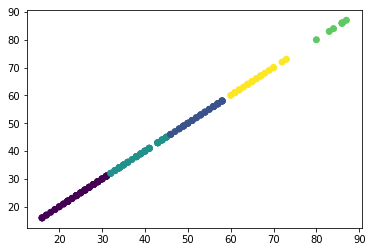

In [30]:
plt.scatter(data1,data1,c=labels)
plt.show()
